In [1]:
import os
import re
import tensorflow as tf
import tensorflow.python.platform
from tensorflow.python.platform import gfile
import numpy as np
import pandas as pd
import cPickle as pickle

%matplotlib inline

In [3]:
import src.web_predictor as wp

%autoreload 2

In [3]:
wp.create_graph()

with tf.Session() as sess:

    next_to_last_tensor = sess.graph.get_tensor_by_name('pool_3:0')
    
    s = sess
    t = next_to_last_tensor
    


prediction prepared


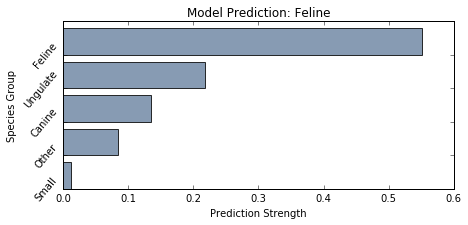

CPU times: user 6.42 s, sys: 304 ms, total: 6.72 s
Wall time: 5.53 s


In [13]:
%%time
x = wp.get_features('data/first_sample/EK000013-2.JPG', s, t)
pred = wp.predict(x)
result = wp.result_array(pred)
wp.plot_pred(pred, result, save_as = 'wptest1')

In [5]:
x

array([[ 0.20091945,  1.18240905,  0.24988347, ...,  0.24383608,
         1.26687336,  0.07820199]], dtype=float32)

In [7]:
pred

(array(['Feline'], dtype=object),
 array([[ 0.13434232,  0.55125585,  0.08448033,  0.01136294,  0.21855856]]))

# START HERE
## to test wp stand alone power

In [8]:
%%time 
s,t = wp.setup()

CPU times: user 2.01 s, sys: 2.11 s, total: 4.12 s
Wall time: 5.48 s


prediction prepared
CPU times: user 6.24 s, sys: 266 ms, total: 6.51 s
Wall time: 5.16 s


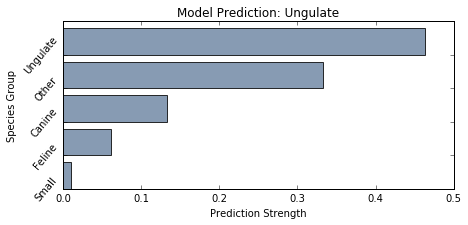

In [11]:
%%time
result = wp.primary('data/first_sample/EK000030-2.JPG', s, t, 'wptest2')
result

prediction prepared
CPU times: user 6.21 s, sys: 281 ms, total: 6.49 s
Wall time: 5.26 s


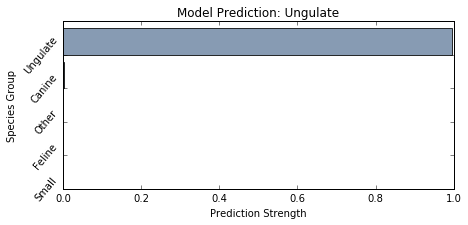

In [12]:
%%time
result = wp.primary('data/first_sample/EK000027-2.JPG', s, t, 'wptest3')


In [13]:
result

[autoreload of src.web_predictor failed: Traceback (most recent call last):
  File "/Users/ophidian/anaconda/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: No module named web_prediction
]


,groups,pred_strength
3,Small,0.000093
1,Feline,0.000158
2,Other,0.000793
0,Canine,0.003331
4,Ungulate,0.995625
